<a href="https://colab.research.google.com/github/misbah4064/signatureExtractor/blob/main/Signature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#  Link to the author's repo
#  https://github.com/ahmetozlu/signature_extractor/tree/feature-doc_scanner_sign_extrator

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import skimage
from skimage import measure, morphology
from skimage.color import label2rgb
from skimage.measure import regionprops

In [27]:
img = cv2.imread('in1.jpg', 0)
img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1] 

blobs = img > img.mean()
blobs_labels = measure.label(blobs, background=1)
image_label_overlay = label2rgb(blobs_labels, image=img)

the_biggest_component: 575
average: 24.514018691588785
a4_constant: 172.95838896306185


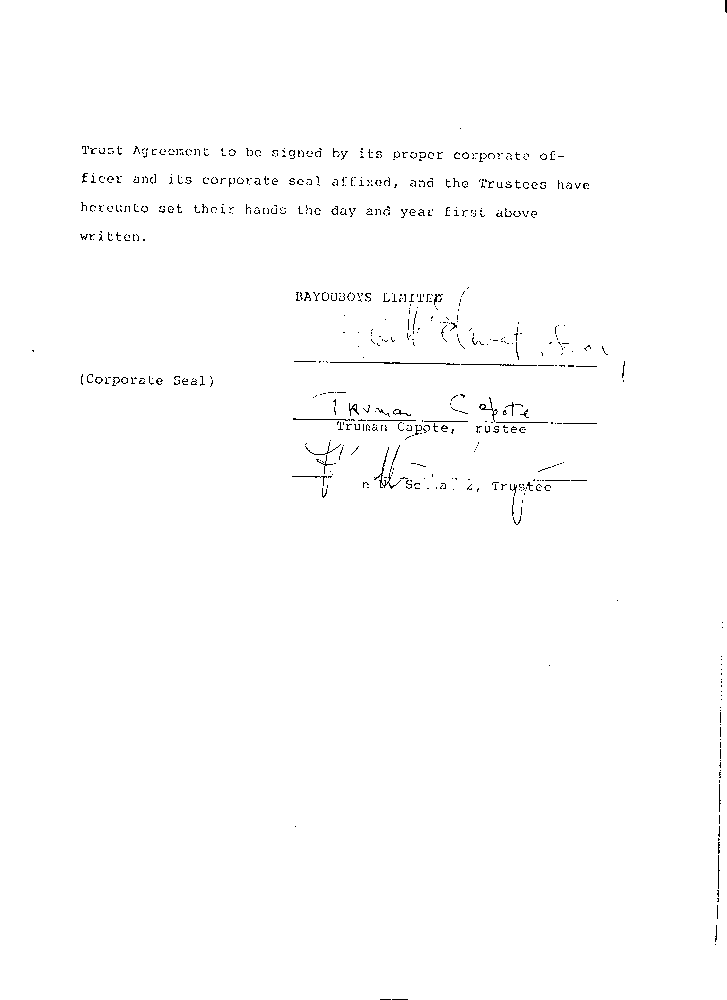

In [26]:
the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0
for region in regionprops(blobs_labels):
    if (region.area > 10):
        total_area = total_area + region.area
        counter = counter + 1
    if (region.area >= 250):
        if (region.area > the_biggest_component):
            the_biggest_component = region.area

average = (total_area/counter)
print("the_biggest_component: " + str(the_biggest_component))
print("average: " + str(average))

a4_constant = ((average/84.0)*250.0)+100
print("a4_constant: " + str(a4_constant))

b = morphology.remove_small_objects(blobs_labels, a4_constant)

plt.imsave('pre_version.png', b)

# read the pre-version
img2 = cv2.imread('pre_version.png', 0)
# ensure binary
img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# save the the result
# cv2_imshow(img2)
cv2.imwrite("output.png", img2)
# cv2_imshow(img)
diff = cv2.bitwise_xor(img,img2)
diff = cv2.bitwise_not(diff)
cv2_imshow(diff)